In [1]:
import h5py
import os
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os
import matplotlib.patches as patches
sns.set_style('darkgrid')
import pickle
from matplotlib import gridspec
from matplotlib.lines import Line2D
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

/Users/trongnguyen/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
%load_ext autoreload
%autoreload 2

In [2]:
sns.set_context("poster", rc={"font.size":18,"axes.titlesize":18,"axes.labelsize":18}) 
import matplotlib 
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

In [3]:
os.chdir('/Users/trongnguyen/Dropbox/FattyLiver/src/hydrogen/')

In [4]:
os.chdir('/Users/trongnguyen/Dropbox/FattyLiver/src/hydrogen/')
from helper_brl.outlierDetection import getBSC_Att, envDetection, filter_BSC_based_on_depth, findOutliers

In [5]:
from helper_brl import fattyLiver

In [6]:
from helper_brl.visualizeHelper import extract_segment_points

In [7]:
newdataBase = pd.read_excel('/Users/trongnguyen/Dropbox/FattyLiver/Rabbit_Liver_40.xlsx', sheet_name=0)
aliveOnly = newdataBase[newdataBase['Timely death'] == 1][['Rabbit', 'Weeks on diet', 'Lipid', 'Injection level']]
dataBase = aliveOnly.dropna()
dataBase = dataBase[['Rabbit', 'Injection level', 'Weeks on diet','Lipid']]

In [8]:
threshold_lipid = 6
dataBase['High_fat'] = dataBase.Lipid > threshold_lipid
dataBase = dataBase.sort_values(['Lipid'])
dataBase.index = range(1, len(dataBase)+1)
# Sep 14 2018 06:52 PM

In [10]:
%qtconsole

In [9]:
ATTs_dict, freq_att_dict, freq_bsc_dict, depth_dict, BSCs_dict = {}, {}, {}, {}, {} 
left_dict, right_dict, top_dict, bottom_dict = {}, {}, {}, {} # ROIs of each BSC
att_bottom, bad_BSC = {}, {}
name_tag = 'fix_bug_average_ref_phantom_3_6MHz_v8_10a40_30b_v2'

number = str(int(748))
print(number, end = ', ')
path = "/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L" + number + "/L94_left/BSC_ATT/"
ATTs_dict[number], freq_att_dict[number], BSCs_dict[number], freq_bsc_dict[number], \
depth_dict[number], left_dict[number], right_dict[number], \
top_dict[number], bottom_dict[number], att_bottom[number], bad_BSC[number] = getBSC_Att(path,name_tag)

748, 

# Loading RF data 

In [10]:
%qtconsole

In [10]:
sns.set_style('white')

In [11]:
rf_path = '/Volumes/TrongDrive/Liver_Study/RF_hdf5/'

In [12]:
hf = h5py.File(rf_path + number + '.h5', 'r')
gp = hf.get('L94/Left')
image = np.array(gp.get(str(2)))
hf.close()

In [13]:
fs = 40e6 * 1.0
speedOfSound = 1540.0
lateralDistance = 38
lineLength  = image.shape[0]
axialDistance = lineLength * speedOfSound/2 / fs * 1000
extent = [0, lateralDistance, 0, axialDistance]

# Load reference phantom

In [14]:
rabbit_numbers = dataBase[dataBase['Injection level']>0].Rabbit.values

In [18]:
rabbit_numbers[28]

766

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/


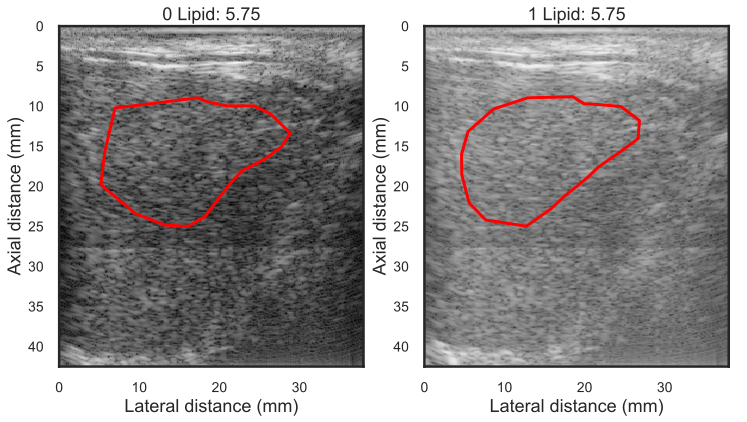

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/


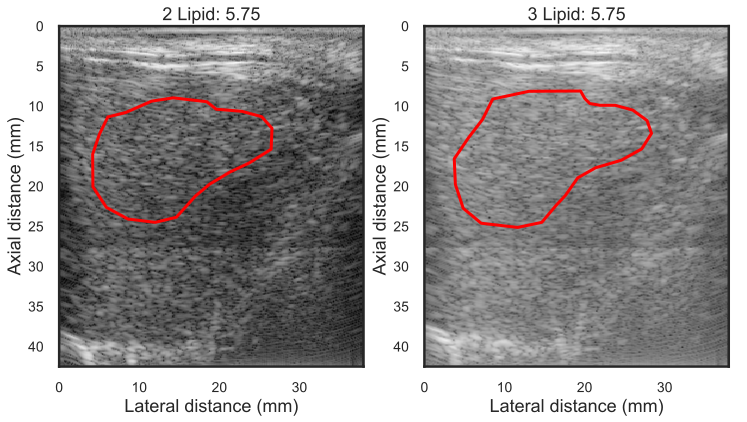

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/


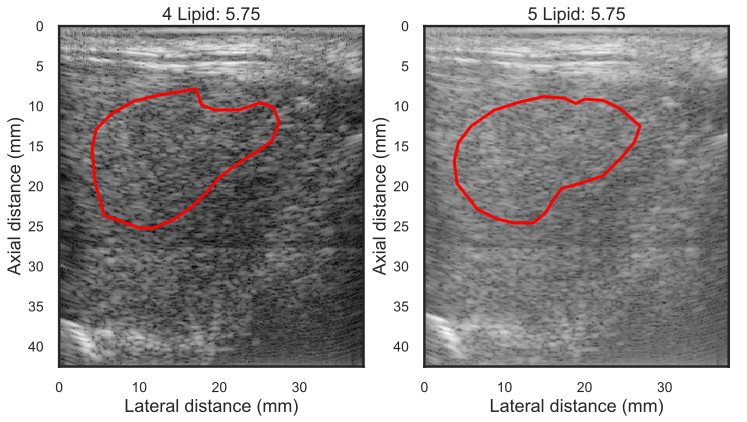

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/


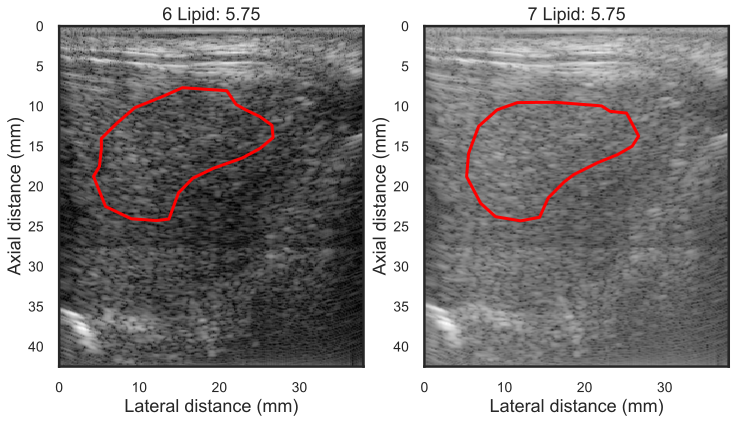

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/


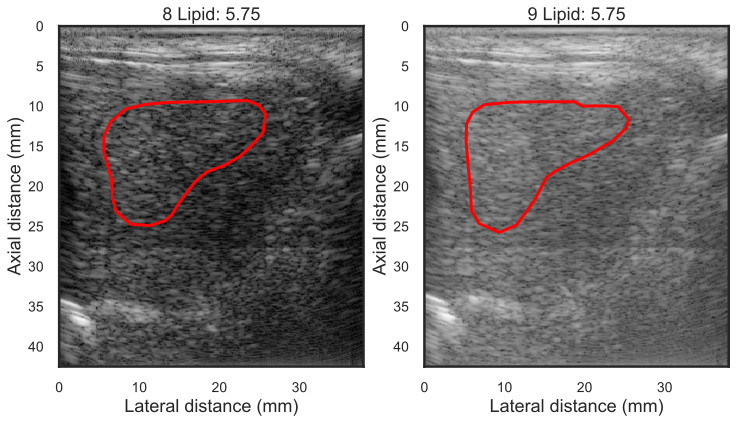

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/


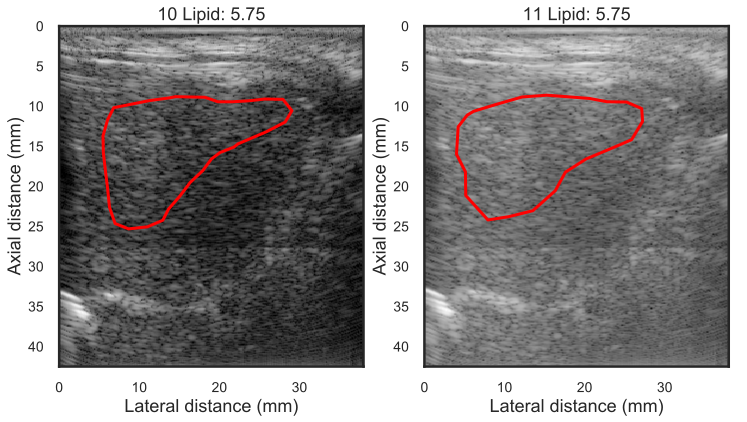

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/


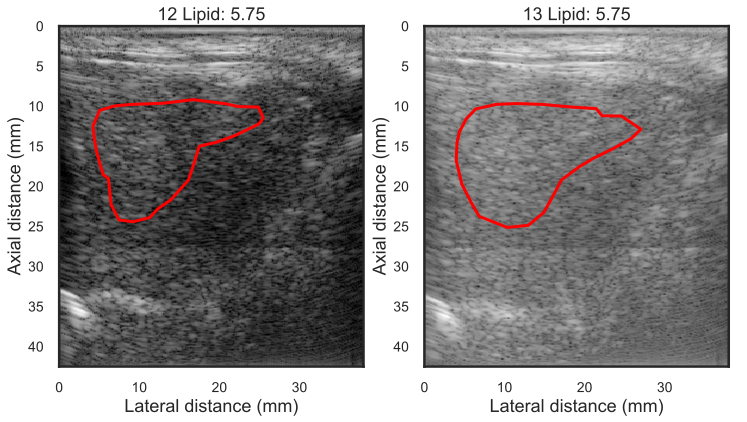

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/


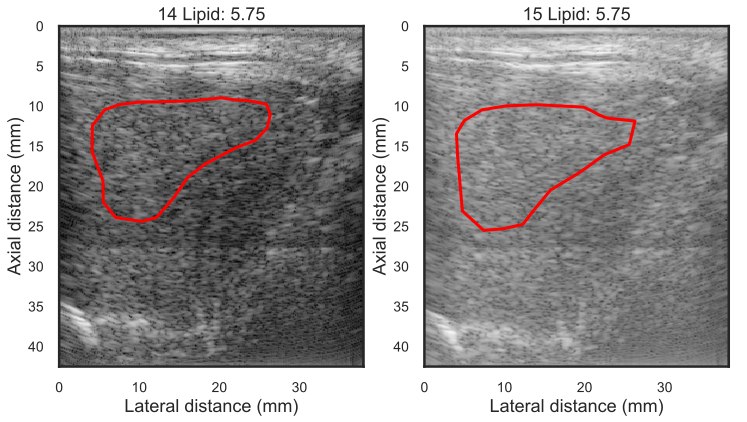

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/


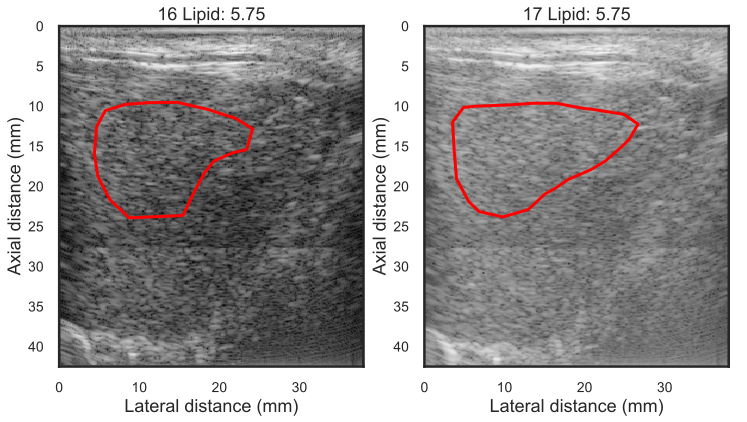

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/


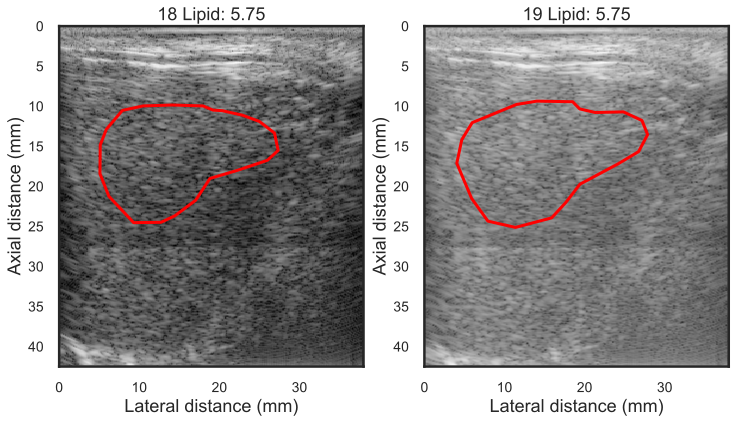

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/


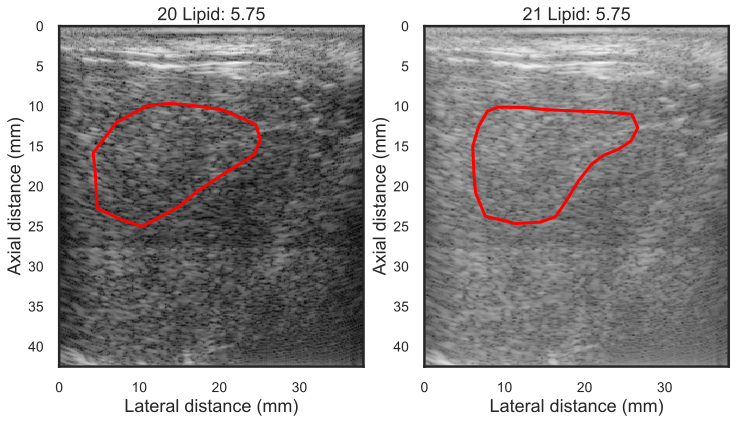

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/


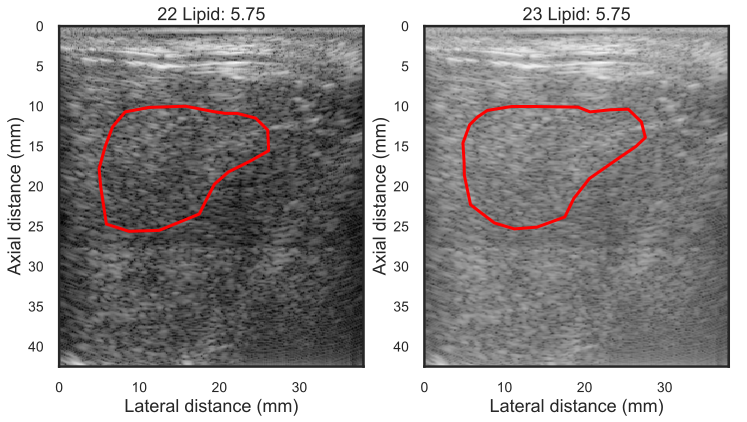

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/


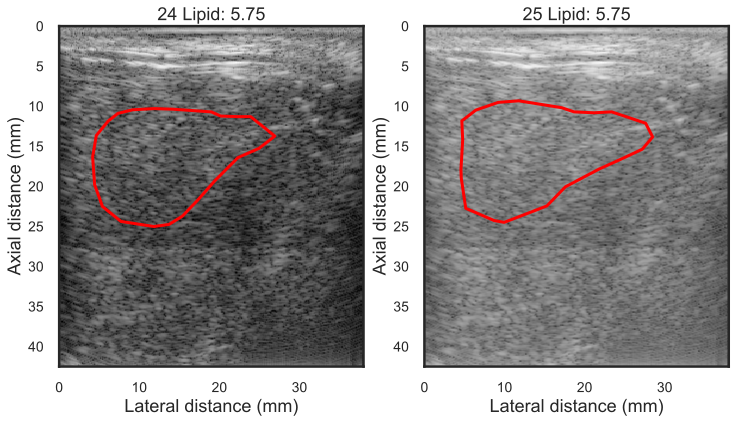

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/


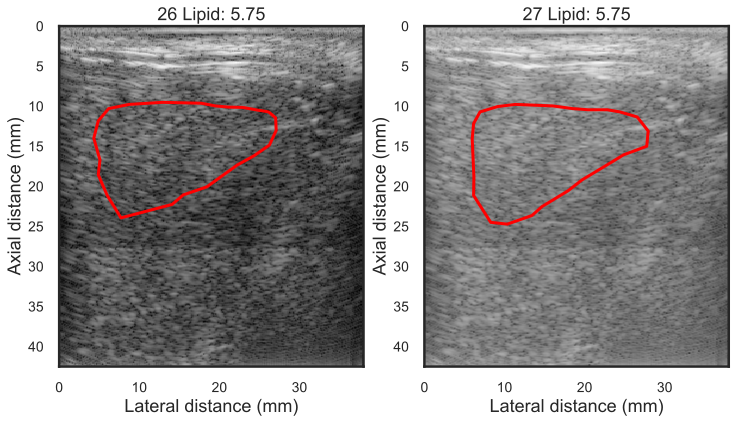

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/


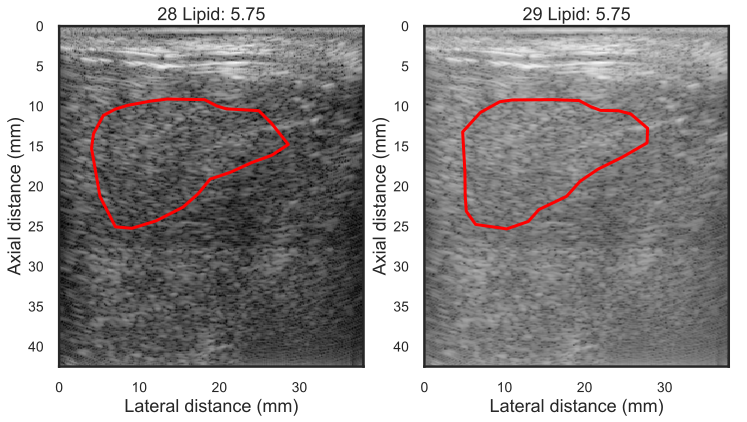

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/


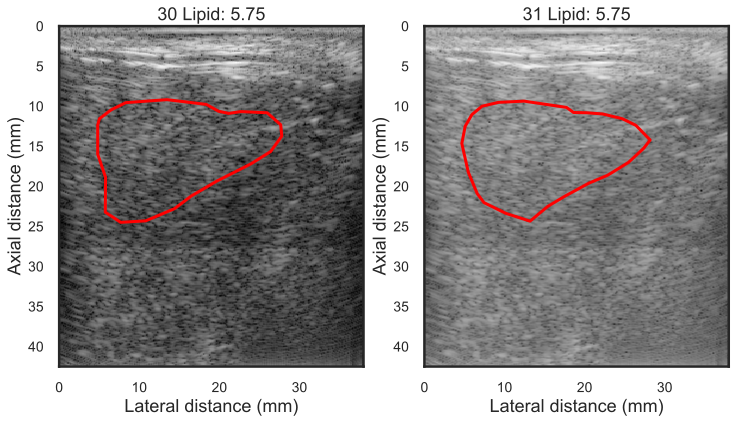

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/


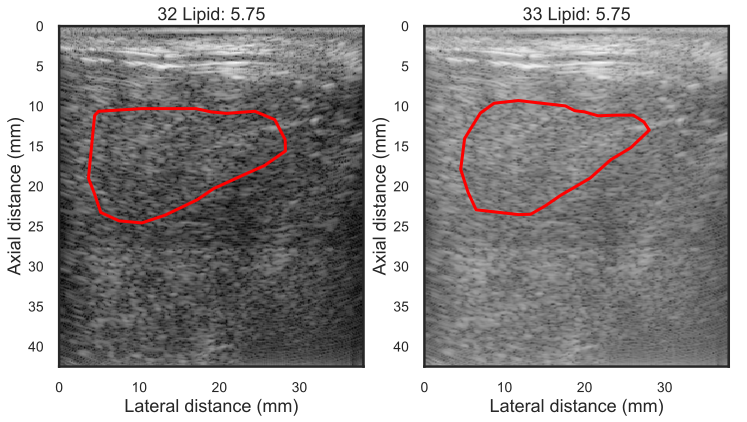

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/


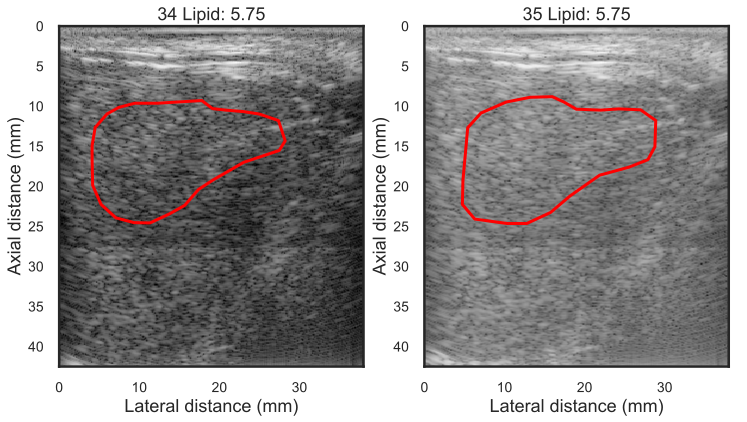

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/


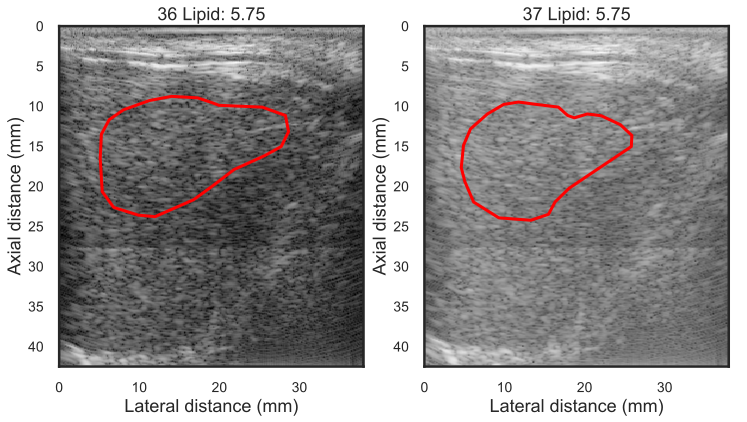

/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/
/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L766/L94_left/segment_points/


In [ ]:
root_path = '/Volumes/TrongDrive/Liver_Study/PostProcessedFiles/L'
tmp = [rabbit_numbers[28]]
for rabbit_number in tmp:
    number = str(rabbit_number)
    lipid = dataBase.loc[dataBase.Rabbit == int(number), 'Lipid'].values[0]
    frame_list = np.arange(1, 51)
    count = 0
    for idx in range(0, int(len(frame_list)/2)):

        fig = plt.figure(figsize = (12, 10))
        ax1 = fig.add_subplot(121)
        frameNumber = int(frame_list[count]) - 1
        path = root_path + number + '/L94_left/segment_points/'
        #path = root_path + number + '/L94_right/segment_points/'
        segmentPoints = extract_segment_points(path, frameNumber)

        hf = h5py.File(rf_path + number + '.h5', 'r')
        gp = hf.get('L94/Left')
        #gp = hf.get('L94/Right')   
        image = np.array(gp.get(str(frameNumber)))

        envIm = envDetection(image) # the envelope image

        ax1.imshow(np.flipud(envIm), vmax = 0, vmin = -60, extent = extent, \
                      aspect = 1,  cmap=plt.cm.gray)

        ax1.invert_yaxis()
        ax1.set_title(str(frameNumber) + ' Lipid: '+ str(lipid))
        ax1.set_xlabel('Lateral distance (mm)')
        ax1.set_ylabel('Axial distance (mm)')
        line = Line2D(segmentPoints[0,:], segmentPoints[1,:], color = 'r', linewidth = '3')    
        ax1.add_line(line)
        hf.close()

        count = count + 1
        ax2 = fig.add_subplot(122)

        frameNumber = int(frame_list[count]) - 1
        #path = root_path+number+'/RF/newSegmentPoints/'
        segmentPoints = extract_segment_points(path, frameNumber)

        hf = h5py.File(rf_path + number + '.h5', 'r')
        gp = hf.get('L94/Left')
        #gp = hf.get('L94/Right')
        image = np.array(gp.get(str(frameNumber)))

        envIm = envDetection(image) # the envelope image

        ax2.imshow(np.flipud(envIm), vmax = 0, vmin = -60, extent = extent, \
                      aspect = 1,  cmap=plt.cm.gray)

        ax2.invert_yaxis()
        ax2.set_title(str(frameNumber) + ' Lipid: '+ str(lipid))
        ax2.set_xlabel('Lateral distance (mm)')
        ax2.set_ylabel('Axial distance (mm)')
        line = Line2D(segmentPoints[0,:], segmentPoints[1,:], color = 'r', linewidth = '3')    
        ax2.add_line(line)
        hf.close()
        count = count + 1
        plt.show()

In [14]:
lipid

Series([], Name: Lipid, dtype: float64)